In [1]:
# Import Basic Packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
import datetime as dt

In [2]:
#reading the dataset
df = pd. read_pickle('Interview_Data_2022.pkl')
df.head(20)

,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw)
2016-01-01 07:24:00-07:00,9.807612,1.301536,NaN,NaN
2016-01-01 07:25:00-07:00,9.907775,3.096331,NaN,NaN
2016-01-01 07:26:00-07:00,9.984213,3.999132,4.704255,-0.691365
2016-01-01 07:27:00-07:00,10.004195,4.800663,5.450435,-0.691467
2016-01-01 07:28:00-07:00,10.100915,5.901452,6.617401,-0.692205
2016-01-01 07:29:00-07:00,9.992343,3.699786,7.965980,-0.692133
2016-01-01 07:30:00-07:00,9.914239,4.101297,12.026873,-0.692282
2016-01-01 07:31:00-07:00,9.903265,4.102013,18.974673,-0.691322
2016-01-01 07:32:00-07:00,10.011466,3.702632,24.522087,-0.690895
2016-01-01 07:33:00-07:00,10.004281,3.202484,23.882122,-0.691231


In [3]:
df.index.name = 'datetime' #naming the index column as datetime
#check out the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1337487 entries, 2016-01-01 07:24:00-07:00 to 2020-12-31 16:45:00-07:00
Data columns (total 4 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Ambient Temperature (C)  1337487 non-null  float64
 1   Wind Speed (m/s)         1337487 non-null  float64
 2   POA Irradiance (w/m^2)   1329517 non-null  float64
 3   Power (kw)               1329531 non-null  object 
dtypes: float64(3), object(1)
memory usage: 51.0+ MB


There are 1337487 total rows. The data type of frist three columns i.e Ambient Temperature (C), Wind Speed (m/s) and POA Irradiance (w/m^2) are all in float64 format which is good. However, Power(kW) data is in object format. Therefore it need to be changed to float64. 

In [4]:
#converting Power (kw) column to float64 dtype.
df['Power (kw)'] = df['Power (kw)'].astype(float, errors = 'raise') 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1337487 entries, 2016-01-01 07:24:00-07:00 to 2020-12-31 16:45:00-07:00
Data columns (total 4 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Ambient Temperature (C)  1337487 non-null  float64
 1   Wind Speed (m/s)         1337487 non-null  float64
 2   POA Irradiance (w/m^2)   1329517 non-null  float64
 3   Power (kw)               1329531 non-null  float64
dtypes: float64(4)
memory usage: 51.0 MB


### Working with NaNs

In [5]:
# count the number of nulls in the data set
df.isna().sum()

Ambient Temperature (C)       0
Wind Speed (m/s)              0
POA Irradiance (w/m^2)     7970
Power (kw)                 7956
dtype: int64

There are 7970 NaNs on POA Irradiance and Power data. Before filling it using some method, it is good to know how many consecutive NaNs are there. 

In [6]:
#Caclulating percentage of NaNs in the dataset
print(df['POA Irradiance (w/m^2)'].isna().sum()/len(df))
print(df['Power (kw)'].isna().sum()/len(df))

0.005958936423307292
0.005948469031848534


In [7]:
#counting maximum number of consecutive nans in POA irradinace
count_nan_POA = df['POA Irradiance (w/m^2)'].isnull().astype(int).groupby(df['POA Irradiance (w/m^2)'].notnull().astype(int).cumsum()).sum()
count_nan_POA.max()

7

In [8]:
#counting maximum number of consecutive nans in Power
count_nan_P = df['Power (kw)'].isnull().astype(int).groupby(df['Power (kw)'].notnull().astype(int).cumsum()).sum()
count_nan_P.max()

7

It apprears to not be that many null values in comparision to the total number of data i.e about **0.6 %**. However, it is not a goood idea to delete them becasue that will mess with the time series. Lets check if NaNs occur at same time in both Power and POA Irradiance or not. If not we can find relationship between them to fill them.  

In [9]:
#Checking if both POA Irradiance and Power are NaNs at a same row 
df1 = df[['POA Irradiance (w/m^2)','Power (kw)']]
print(df1[df1['POA Irradiance (w/m^2)'].isna() & df1['Power (kw)'].isna()])

                           POA Irradiance (w/m^2)  Power (kw)
datetime                                                     
2016-01-01 07:24:00-07:00                     NaN         NaN
2016-01-01 07:25:00-07:00                     NaN         NaN
2016-01-01 16:44:00-07:00                     NaN         NaN
2016-01-01 16:45:00-07:00                     NaN         NaN
2016-01-02 07:24:00-07:00                     NaN         NaN
...                                           ...         ...
2020-12-30 16:44:00-07:00                     NaN         NaN
2020-12-31 07:24:00-07:00                     NaN         NaN
2020-12-31 07:25:00-07:00                     NaN         NaN
2020-12-31 16:44:00-07:00                     NaN         NaN
2020-12-31 16:45:00-07:00                     NaN         NaN

[7932 rows x 2 columns]


In [10]:
df['POA Irradiance (w/m^2)'].isna().sum() - 7932

38

In [11]:
df['Power (kw)'].isna().sum() - 7932

24

More than 99 % of the NaNs value occur at a same time. So, we cannot fill NaNs by finding correlation to each other. So, Lets do it using some popular method used for time series. If there were not any consecutive NaNs forward filling/backward filling would be best. But there are consecutive NaNs so moving average gives good prediction.  

In [12]:
#df['POA Irradiance (w/m^2)']=df['POA Irradiance (w/m^2)'].fillna(df['POA Irradiance (w/m^2)'].rolling(100).mean())
#Applying moving average method for Power column
for i in range(3,len(df)):
    if pd.isna(df.iloc[i, 3]):
        moving = df.iloc[i-11:i-1, 3].mean()
        df.iloc[i, 3] = moving
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1337487 entries, 2016-01-01 07:24:00-07:00 to 2020-12-31 16:45:00-07:00
Data columns (total 4 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Ambient Temperature (C)  1337487 non-null  float64
 1   Wind Speed (m/s)         1337487 non-null  float64
 2   POA Irradiance (w/m^2)   1329517 non-null  float64
 3   Power (kw)               1337485 non-null  float64
dtypes: float64(4)
memory usage: 51.0 MB


In [13]:
df

,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw)
datetime,,,,
2016-01-01 07:24:00-07:00,9.807612,1.301536,NaN,NaN
2016-01-01 07:25:00-07:00,9.907775,3.096331,NaN,NaN
2016-01-01 07:26:00-07:00,9.984213,3.999132,4.704255,-0.691365
2016-01-01 07:27:00-07:00,10.004195,4.800663,5.450435,-0.691467
2016-01-01 07:28:00-07:00,10.100915,5.901452,6.617401,-0.692205
...,...,...,...,...
2020-12-31 16:41:00-07:00,2.199453,10.602189,6.000877,-0.692031
2020-12-31 16:42:00-07:00,2.102146,9.810486,5.509629,-0.691690
2020-12-31 16:43:00-07:00,2.094691,9.284071,5.293106,-0.691843


In [15]:
#It is obvious that moving average cannot fill first two values. So we will use back filling method to replace those values. 
df['Power (kw)'] = np.where(df['Power (kw)'].isna(), df['Power (kw)'].bfill() ,df['Power (kw)'])
df.info()                

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1337487 entries, 2016-01-01 07:24:00-07:00 to 2020-12-31 16:45:00-07:00
Data columns (total 4 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Ambient Temperature (C)  1337487 non-null  float64
 1   Wind Speed (m/s)         1337487 non-null  float64
 2   POA Irradiance (w/m^2)   1329517 non-null  float64
 3   Power (kw)               1337487 non-null  float64
dtypes: float64(4)
memory usage: 51.0 MB


In [ ]:
Lets follow the same procedure for POA Irradiance

In [16]:
#Applying moving average method and back filling method for POA Irradiance column
for i in range(3,len(df)):
    if pd.isna(df.iloc[i, 2]):
        moving = df.iloc[i-11:i-1, 2].mean()
        df.iloc[i, 2] = moving
df['POA Irradiance (w/m^2)'] = np.where(df['POA Irradiance (w/m^2)'].isna(), df['POA Irradiance (w/m^2)'].bfill() ,df['POA Irradiance (w/m^2)'])
df.info()                                 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1337487 entries, 2016-01-01 07:24:00-07:00 to 2020-12-31 16:45:00-07:00
Data columns (total 4 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Ambient Temperature (C)  1337487 non-null  float64
 1   Wind Speed (m/s)         1337487 non-null  float64
 2   POA Irradiance (w/m^2)   1337487 non-null  float64
 3   Power (kw)               1337487 non-null  float64
dtypes: float64(4)
memory usage: 51.0 MB


Now we have complete dataset with no empty values

## Finding physically impossible/unlikely data points

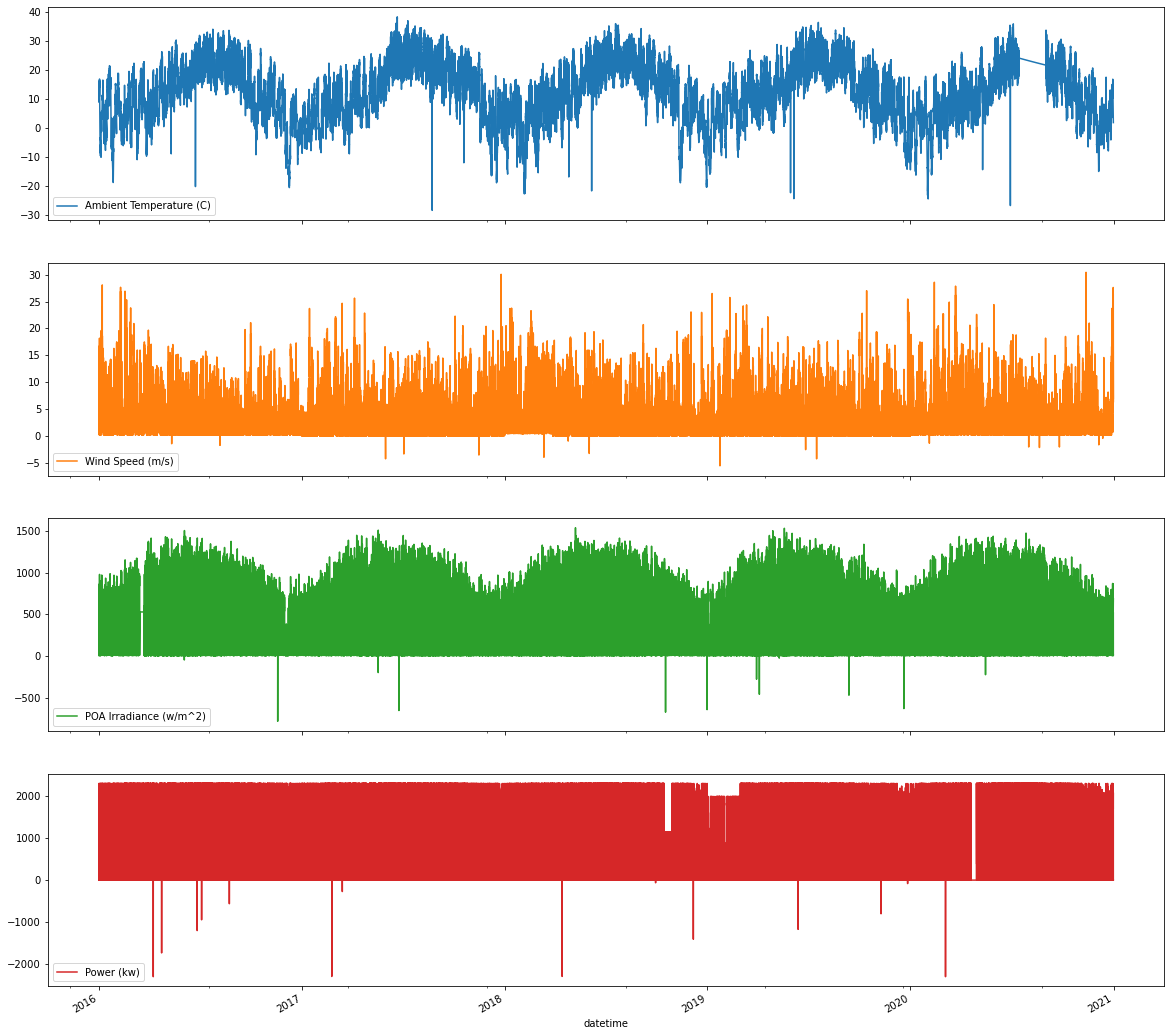

In [17]:
#Lets check the overall dataset after filling NaNs
#Plot of evolution of feature over time. 
plot_cols = ['Ambient Temperature (C)', 'Wind Speed (m/s)', 'POA Irradiance (w/m^2)', 'Power (kw)']
plot_features = df[plot_cols]
_ = plot_features.plot(subplots=True, figsize = (20,20))

In [19]:
#Looking at the statistics of dataset. 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ambient Temperature (C),1337487.0,14.065283,10.070531,-28.564103,7.004606,15.079118,22.074986,38.376114
Wind Speed (m/s),1337487.0,3.567276,2.881562,-5.496709,1.701279,2.703734,4.394155,30.425901
POA Irradiance (w/m^2),1337487.0,507.793785,373.083961,-785.021595,132.792583,505.535849,863.440847,1537.720755
Power (kw),1337487.0,1320.751512,903.437338,-2309.278316,371.504837,1460.434011,2304.346729,2317.143741


if we look at the minumum value of the variables from plot and descriptive statistics of dataset: 
1) Negative value of wind speed is physically impossible. It can be zero but not below that.  

2) Negative value of POA Irradiance is also not possible. Small negative values in the irradiance could be result of the measuring errors and the nature of the measuring instrument. Typically, at nighttime measurement can be negative due to the long wave radiation heat loss from the absorber surface of actinometer to the deep sky. So, data logger error measurement should also consider during measurement. We need to check if it is outlier or there are many such negative data. If there are many such data we need to work on other data as per the negative value of Irradiance.  

3) Power also cannot be negative. However, there might be few amount of power that can be leaked to the system through battery packs when the plant is not generating any power specially in the morning.If the battery is connected into the dc bus with a bi-directional boost converter, the battery can also push power back to the PV modules so that the power output from it may be negative. To prevent the dc negative power, a series blocking diode must be connected just after the PV panel. But nowdays all the PV power plant should have such mechanicsm to prevent drawing power form battery.  We have to confirm where we got those small negative value or the value are really high.  So, first need to confirm it and then filter out those high negative power and low negative power. 

In [20]:
#counting no of negative wind speed values
(df['Wind Speed (m/s)'] < 0).sum().sum()

17

In [21]:
#counting no of negative POA Irradiance values
(df['POA Irradiance (w/m^2)'] < 0).sum().sum()

12

In [22]:
#Counting no of negative power values
(df['Power (kw)'] < 0).sum().sum()

55635

The number of negative values for Wind Speed (m/s) and POA Irradiance (w/m^2) are negligible. However, the negative value for power is quite much. So we need to check it in detail. 

In [23]:
#where are the wind speed negative
Error_df_WS= df.loc[(df['Wind Speed (m/s)'] < 0)]
Error_df_WS

,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw)
datetime,,,,
2016-05-11 12:16:00-07:00,14.986056,-1.400037,999.038162,2309.183342
2016-08-06 11:24:00-07:00,26.870441,-1.698763,497.445833,1431.275540
2017-05-31 12:42:00-07:00,16.309089,-4.197678,386.120793,1130.980234
2017-07-03 11:00:00-07:00,26.810042,-3.299653,818.634136,2302.449294
2017-11-15 13:13:00-07:00,23.300789,-3.493420,641.161249,1886.752225
2018-03-12 14:48:00-07:00,9.186592,-3.906055,954.408009,2307.448505
2018-04-25 07:54:00-07:00,10.896377,-0.900790,595.145223,1863.441101
2018-06-02 04:55:00-07:00,12.699775,-3.200789,58.690099,112.065611
2019-01-23 12:49:00-07:00,10.814082,-5.496709,770.530063,2000.000000


In [24]:
#where are the POA Irradiance negative
Error_df_POA= df.loc[(df['POA Irradiance (w/m^2)'] < 0)]
Error_df_POA

,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw)
datetime,,,,
2016-06-03 06:11:00-07:00,8.199398,2.506055,-49.335975,151.557568
2016-11-18 08:21:00-07:00,10.102320,0.600181,-785.021595,2307.570838
2017-05-18 07:14:00-07:00,8.400621,0.600228,-200.564238,632.009058
2017-06-24 13:47:00-07:00,32.481559,4.596756,-656.011665,1716.009508
2018-10-17 13:31:00-07:00,14.211698,2.201149,-675.793710,1020.544768
2018-12-31 08:38:00-07:00,-9.295066,2.700326,-645.518657,2118.463986
2019-03-30 09:48:00-07:00,8.985223,3.296598,-280.084352,871.283216
2019-04-04 10:33:00-07:00,1.000629,3.599742,-460.875641,1446.938097
2019-05-10 05:55:00-07:00,9.894949,2.498430,-26.917482,73.165729


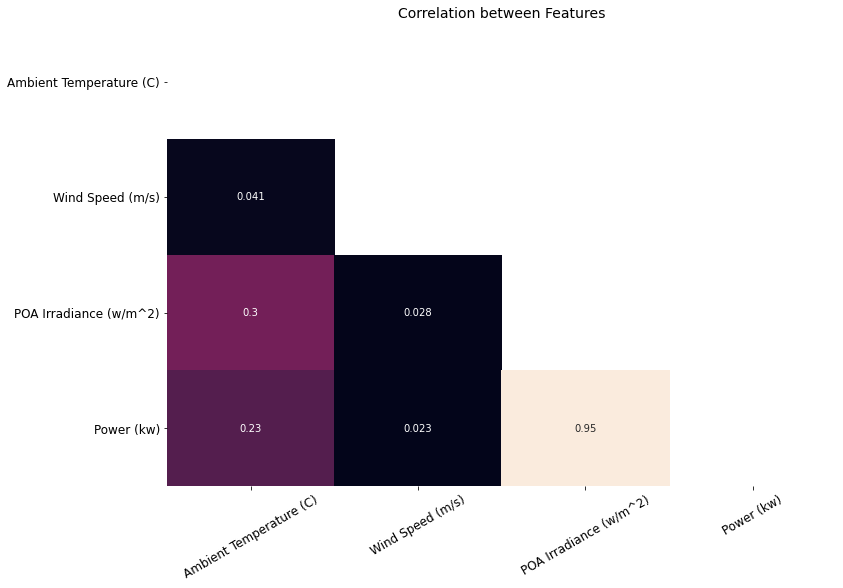

In [25]:
#Lokking at the correlation of different features of dataset. 
#developing function to get customized heatmap
def correlation_heat_map(df, title, size):
    """DOCSTRING
    This function plots a correlation heatmap for a dataframe, masking duplicate values.
    """
    corrs = df.corr()
    
    # set figure size
    fig, ax = plt.subplots(figsize = size)
    
    # generate a mask for the upper triagle 
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    #plot heatmap
    ax = sns.heatmap(corrs, mask=mask, annot = True, cbar=False)
    
    #resize labels
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12, rotation=0)
    ax.set_title(title, fontsize=14)
    
    plt.show()
correlation_heat_map(df[['Ambient Temperature (C)', 'Wind Speed (m/s)', 'POA Irradiance (w/m^2)','Power (kw)']], 'Correlation between Features', (12,8.5))

Looking at the wind speed, there are not specific patten in the error data i.e negative data. And there is not any correlation with any other data. So, its hard to design any specific filter which can capture such specific pattern and remove it from data. So, we will use **Persistence Data Filling Model** i.e forward filling as we also dont see consecutive negative values. 

For the POA Irradiance and Power, lets check if we can fit linear model. But for the time series data, we may need to check the time at which the power become negative and see the relationship with other variable. 

In [ ]:
#Lets check the R2 value by making linear model for each feature with Power
import scipy.stats
%pylab inline
m, b, r_value, p_value, std_err = scipy.stats.linregress(df2['POA Irradiance (w/m^2)'], df2['Power (kw)'])

fig, ax = plt.subplots()
ax.scatter(df2['POA Irradiance (w/m^2)'],df2['Power (kw)'])
ax.plot(df2['POA Irradiance (w/m^2)'], m*df2['POA Irradiance (w/m^2)'] + b)
#ax.annotate('r^2: ' + str("{:.2f}".format(r_value**2)), xy=(1950,19500))
#ax.annotate('formula: ' + str("{:.2f}".format(m)) + 'x + ' + str("{:.2f}".format(b)), xy=(1950,18500))
ax.set_xlabel("POA Irradiance (w/m^2)")
ax.set_ylabel("Power (kw)")
fig.show()

print(r_value**2)
print(m)
print(b)
print(p_value)
print(std_err)

Therefore, we can filter the nans and missing Power values using linear model provided POA irradiance

In [ ]:
#Lets check the R2 value by making linear model for Power with POA Irradiance
import scipy.stats
%pylab inline
m1, b1, r_value1, p_value1, std_err1 = scipy.stats.linregress(df2['Power (kw)'], df2['POA Irradiance (w/m^2)'])

fig, ax = plt.subplots()
ax.scatter(df2['Power (kw)'], df2['POA Irradiance (w/m^2)'])
ax.plot(df2['Power (kw)'], m1*df2['Power (kw)'] + b1)
#ax.annotate('r^2: ' + str("{:.2f}".format(r_value**2)), xy=(1950,19500))
#ax.annotate('formula: ' + str("{:.2f}".format(m)) + 'x + ' + str("{:.2f}".format(b)), xy=(1950,18500))
ax.set_xlabel("Power (kw)")
ax.set_ylabel("POA Irradiance (w/m^2)")
fig.show()

print(r_value1**2)
print(m1)
print(b1)

In [26]:
#Lets check the power in detail
#where power is less than -1 kw  
Error_df_P= df.loc[(df['Power (kw)'] < -1)]
print(len(Error_df_P))
Error_df_P

14


,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw)
datetime,,,,
2016-04-08 08:42:00-07:00,9.808707,1.199444,1037.486998,-2309.278316
2016-04-23 09:06:00-07:00,21.914132,1.798144,576.604082,-1740.427083
2016-06-26 10:46:00-07:00,24.581756,2.499785,424.512411,-1206.446723
2016-07-04 08:28:00-07:00,18.778378,2.502892,326.464106,-949.069201
2016-08-23 07:25:00-07:00,20.535925,1.502677,174.396731,-564.674849
2017-02-23 16:20:00-07:00,4.399444,1.001461,855.424367,-2303.267095
2017-03-14 16:13:00-07:00,9.109461,11.698531,87.634938,-273.008156
2018-04-14 10:24:00-07:00,-1.900848,2.200687,1033.911571,-2302.351395
2018-09-29 15:57:00-07:00,13.422079,2.401021,24.546701,-63.715067


We can clearly see that the 14 values of power are outliers and not good for system. Lets check its fit with POA irradiance

In [ ]:
import scipy.stats
%pylab inline
m2, b2, r_value2, p_value2, std_err2 = scipy.stats.linregress(Error_df_P['POA Irradiance (w/m^2)'], Error_df_P['Power (kw)'].abs())

fig, ax = plt.subplots()
ax.scatter(Error_df_P['POA Irradiance (w/m^2)'],Error_df_P['Power (kw)'].abs())
ax.plot(Error_df_P['POA Irradiance (w/m^2)'], m*Error_df_P['POA Irradiance (w/m^2)'] + b2)
#ax.annotate('r^2: ' + str("{:.2f}".format(r_value**2)), xy=(1950,19500))
#ax.annotate('formula: ' + str("{:.2f}".format(m)) + 'x + ' + str("{:.2f}".format(b)), xy=(1950,18500))
ax.set_xlabel("POA Irradiance (w/m^2)")
ax.set_ylabel("Power (kw)")
fig.show()

print(r_value2**2)
print(m2)
print(b2)

We can assume that power is positive as it has same correlation with POA irradiance as other positive dataset. But we can fill it with same model as the negative power in range between 0 and -1

Lets check in detail at what time of day we got negative power.

#### Visualization of Small Negative Power

In [27]:
Small_P= df[df['Power (kw)'].between(-1,0, inclusive = False)]
Small_P

,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw)
datetime,,,,
2016-01-01 07:24:00-07:00,9.807612,1.301536,4.704255,-0.691365
2016-01-01 07:25:00-07:00,9.907775,3.096331,4.704255,-0.691365
2016-01-01 07:26:00-07:00,9.984213,3.999132,4.704255,-0.691365
2016-01-01 07:27:00-07:00,10.004195,4.800663,5.450435,-0.691467
2016-01-01 07:28:00-07:00,10.100915,5.901452,6.617401,-0.692205
...,...,...,...,...
2020-12-31 16:41:00-07:00,2.199453,10.602189,6.000877,-0.692031
2020-12-31 16:42:00-07:00,2.102146,9.810486,5.509629,-0.691690
2020-12-31 16:43:00-07:00,2.094691,9.284071,5.293106,-0.691843


In [28]:
len(Small_P)/len(df)

0.04158619859482746

We need to work on 55621 negative power data which is ***4.1%*** of total dataset. 

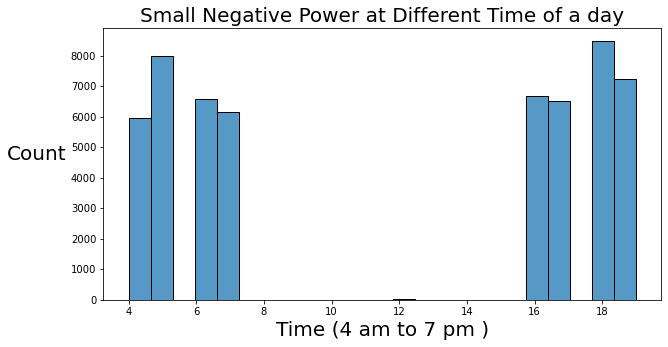

In [30]:
#Checking occurange of small negative value at time of day
df1= Small_P.reset_index()
import datetime as dt
# create utc_timestamp as a column and another hour column
df1['datetime'] = pd.to_datetime(df1['datetime']).apply(lambda x: dt.datetime.strftime(x,'%Y-%m-%d %H:%M:%S'))
df1['datetime']=pd.to_datetime(df1['datetime'])
df1['hour'] = df1['datetime'].dt.hour

# Create a histogram of the count of negative values at different time

plt.figure(figsize=(10,5))
sns.histplot(df1['hour'])

plt.title('Small Negative Power at Different Time of a day',fontsize=20)

plt.xlabel('Time (4 am to 7 pm )', fontsize=20)

plt.ylabel("Count",rotation='0',ha='right', fontsize=20)
plt.show()

It is clear that the power measuring instrunment doesnt give good reading whan the plant about to start producing power in the morning and after it about to stop producing power

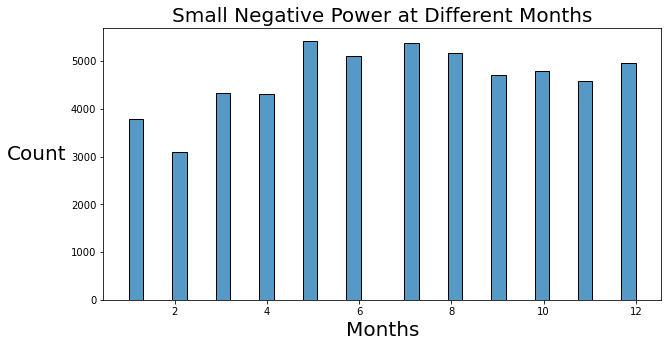

In [31]:
#Checking occurange of small negative value at time of months
df1['month'] = df1['datetime'].dt.month

# Create a histogram of the count of negative values at different time

plt.figure(figsize=(10,5))
sns.histplot(df1['month'])

plt.title('Small Negative Power at Different Months',fontsize=20)

plt.xlabel('Months', fontsize=20)

plt.ylabel("Count",rotation='0',ha='right', fontsize=20)
plt.show()

We are not able to reach any conclusion from months.

Lets check the power at from 4 am 7 am in the morning and 4 pm to 7 pm in the evening for whole dataset to have more insight on data. 

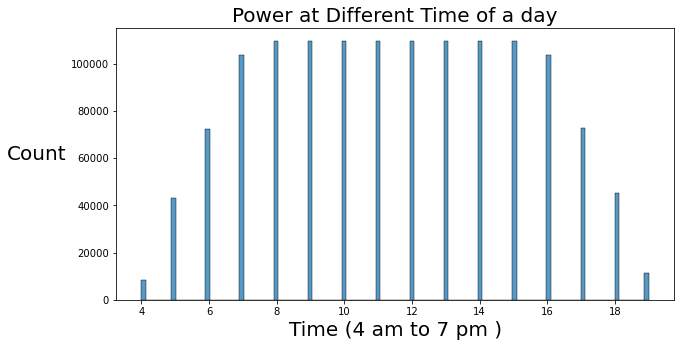

In [32]:
#Checking occurange of small negative value at time of day
df2= df.reset_index()
df2['hour'] = df2['datetime'].dt.hour

# Create a histogram of the count of negative values at different time

plt.figure(figsize=(10,5))
sns.histplot(df2['hour'])

plt.title('Power at Different Time of a day',fontsize=20)

plt.xlabel('Time (4 am to 7 pm )', fontsize=20)

plt.ylabel("Count",rotation='0',ha='right', fontsize=20)
plt.show()

In [33]:
dfme = df2.loc[df2['hour'].isin([4,5,6,7,16,17,18,19])]
dfme.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460527 entries, 0 to 1337486
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype                    
---  ------                   --------------   -----                    
 0   datetime                 460527 non-null  datetime64[ns, Etc/GMT+7]
 1   Ambient Temperature (C)  460527 non-null  float64                  
 2   Wind Speed (m/s)         460527 non-null  float64                  
 3   POA Irradiance (w/m^2)   460527 non-null  float64                  
 4   Power (kw)               460527 non-null  float64                  
 5   hour                     460527 non-null  int64                    
dtypes: datetime64[ns, Etc/GMT+7](1), float64(4), int64(1)
memory usage: 24.6 MB


In [35]:
len(dfme)/len(df)

0.34432259902339235

We need to check this 34 % of data in detail to filter the negative value.

Lets check the descriptive statistics of this morning and evening data and day time data. 

In [38]:
dfd = df2.loc[df2['hour'].isin([8,9,10,11,12,13,14,15])] #day time data
dfd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ambient Temperature (C),876960.0,13.703064,10.433192,-28.564103,6.204021,14.508906,22.127869,38.376114
Wind Speed (m/s),876960.0,3.740885,3.037508,-5.496709,1.800597,2.802318,4.503365,30.425901
POA Irradiance (w/m^2),876960.0,613.937991,340.491375,-785.021595,289.520437,654.312492,928.869781,1537.720755
Power (kw),876960.0,1591.174944,781.910613,-2309.278316,851.040173,1934.681035,2305.452464,2317.143741
hour,876960.0,11.500000,2.291289,8.000000,9.750000,11.500000,13.250000,15.000000


In [40]:
dfme.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ambient Temperature (C),460527.0,14.755040,9.302168,-26.896399,8.583635,15.877266,21.946804,38.321678
Wind Speed (m/s),460527.0,3.236681,2.525665,-3.200789,1.598857,2.597635,4.098175,29.676466
POA Irradiance (w/m^2),460527.0,305.668345,348.095445,-472.063593,29.100944,116.605693,557.671506,1424.136372
Power (kw),460527.0,805.796833,895.424732,-2303.267095,61.541210,316.848931,1671.197202,2315.655559
hour,460527.0,11.580491,5.399580,4.000000,6.000000,16.000000,17.000000,19.000000


It is obvious there is less power production in the morning and evening time. But lets check the relationship of power and irradiance at this time. 

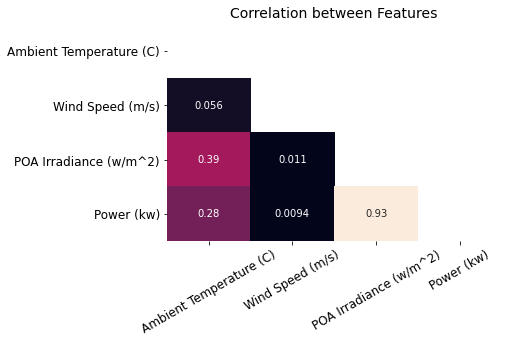

In [41]:
#Lokking at the correlation of different features of dataset. 
#developing function to get customized heatmap
def correlation_heat_map(df, title, size):
    """DOCSTRING
    This function plots a correlation heatmap for a dataframe, masking duplicate values.
    """
    corrs = df.corr()
    
    # set figure size
    fig, ax = plt.subplots(figsize = size)
    
    # generate a mask for the upper triagle 
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    #plot heatmap
    ax = sns.heatmap(corrs, mask=mask, annot = True, cbar=False)
    
    #resize labels
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12, rotation=0)
    ax.set_title(title, fontsize=14)
    
    plt.show()
correlation_heat_map(dfd[['Ambient Temperature (C)', 'Wind Speed (m/s)', 'POA Irradiance (w/m^2)','Power (kw)']], 'Correlation between Features', (6,4))

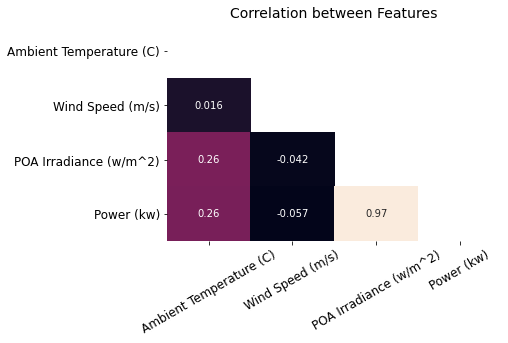

In [42]:
#Lokking at the correlation of different features of dataset. 
#developing function to get customized heatmap
def correlation_heat_map(df, title, size):
    """DOCSTRING
    This function plots a correlation heatmap for a dataframe, masking duplicate values.
    """
    corrs = df.corr()
    
    # set figure size
    fig, ax = plt.subplots(figsize = size)
    
    # generate a mask for the upper triagle 
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    #plot heatmap
    ax = sns.heatmap(corrs, mask=mask, annot = True, cbar=False)
    
    #resize labels
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12, rotation=0)
    ax.set_title(title, fontsize=14)
    
    plt.show()
correlation_heat_map(dfme[['Ambient Temperature (C)', 'Wind Speed (m/s)', 'POA Irradiance (w/m^2)','Power (kw)']], 'Correlation between Features', (6,4))

Seems we can have a liner model to fill the negative power value thorugh given POA Irradiance. However, this negative power can be due to production of small amount of power and error in the instrunment. So lets check it out where there is small power production and its relationship with Irradiance

### Analysis of Production of Small Amount of Power

In [45]:
Low_P= df[df['Power (kw)'].between(0,100, inclusive = True)]
Low_P.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ambient Temperature (C),102453.0,11.259324,9.689937,-23.921449,4.291036,11.108108,19.031553,32.580298
Wind Speed (m/s),102453.0,3.590523,2.636217,0.000000,1.799776,2.993733,4.592855,29.676466
POA Irradiance (w/m^2),102453.0,71.422891,201.849614,-26.917482,14.672288,22.642677,31.930657,1410.996625
Power (kw),102453.0,43.660642,30.726972,0.000000,16.154492,42.029152,70.084069,99.999871


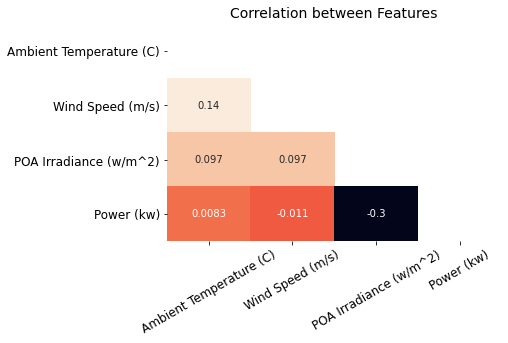

In [46]:
#Lokking at the correlation of different features of dataset. 
#developing function to get customized heatmap
def correlation_heat_map(df, title, size):
    """DOCSTRING
    This function plots a correlation heatmap for a dataframe, masking duplicate values.
    """
    corrs = df.corr()
    
    # set figure size
    fig, ax = plt.subplots(figsize = size)
    
    # generate a mask for the upper triagle 
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    #plot heatmap
    ax = sns.heatmap(corrs, mask=mask, annot = True, cbar=False)
    
    #resize labels
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12, rotation=0)
    ax.set_title(title, fontsize=14)
    
    plt.show()
correlation_heat_map(Low_P[['Ambient Temperature (C)', 'Wind Speed (m/s)', 'POA Irradiance (w/m^2)','Power (kw)']], 'Correlation between Features', (6,4))

In [52]:
High_P= df[df['Power (kw)'].between(100,2317, inclusive = True)]
High_P.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ambient Temperature (C),1179398.0,14.439009,10.059208,-28.564103,7.500566,15.502844,22.373806,38.376114
Wind Speed (m/s),1179398.0,3.576285,2.915031,-5.496709,1.701172,2.701872,4.308863,30.425901
POA Irradiance (w/m^2),1179398.0,569.088925,349.797577,-785.021595,223.193201,591.929549,895.128127,1537.720755
Power (kw),1179398.0,1494.040465,819.374173,100.000545,659.658530,1767.643693,2305.078720,2316.763629


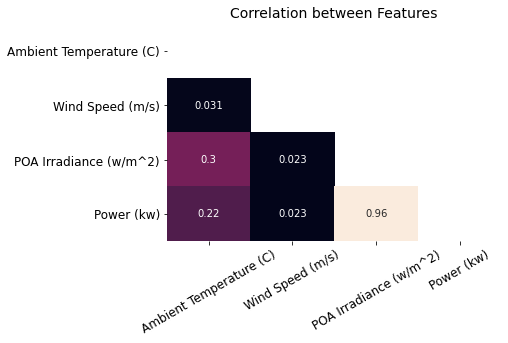

In [53]:
#Lokking at the correlation of different features of dataset. 
#developing function to get customized heatmap
def correlation_heat_map(df, title, size):
    """DOCSTRING
    This function plots a correlation heatmap for a dataframe, masking duplicate values.
    """
    corrs = df.corr()
    
    # set figure size
    fig, ax = plt.subplots(figsize = size)
    
    # generate a mask for the upper triagle 
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    #plot heatmap
    ax = sns.heatmap(corrs, mask=mask, annot = True, cbar=False)
    
    #resize labels
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12, rotation=0)
    ax.set_title(title, fontsize=14)
    
    plt.show()
correlation_heat_map(High_P[['Ambient Temperature (C)', 'Wind Speed (m/s)', 'POA Irradiance (w/m^2)','Power (kw)']], 'Correlation between Features', (6,4))

Hence, there is not goood correlation of power with Irradiance at low power. So, for negative irradiance and high negative power we can see their correlation and assume liner fit it it matches with the orginal data trend

## Filtering Negative Wind Speed, Negative POA Irradiance and High Negative Power

### Working with High Negative Power

In [49]:
Error_df_P

,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw)
datetime,,,,
2016-04-08 08:42:00-07:00,9.808707,1.199444,1037.486998,-2309.278316
2016-04-23 09:06:00-07:00,21.914132,1.798144,576.604082,-1740.427083
2016-06-26 10:46:00-07:00,24.581756,2.499785,424.512411,-1206.446723
2016-07-04 08:28:00-07:00,18.778378,2.502892,326.464106,-949.069201
2016-08-23 07:25:00-07:00,20.535925,1.502677,174.396731,-564.674849
2017-02-23 16:20:00-07:00,4.399444,1.001461,855.424367,-2303.267095
2017-03-14 16:13:00-07:00,9.109461,11.698531,87.634938,-273.008156
2018-04-14 10:24:00-07:00,-1.900848,2.200687,1033.911571,-2302.351395
2018-09-29 15:57:00-07:00,13.422079,2.401021,24.546701,-63.715067


Populating the interactive namespace from numpy and matplotlib
0.9580332854554706


<ipython-input-50-985929524d98>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


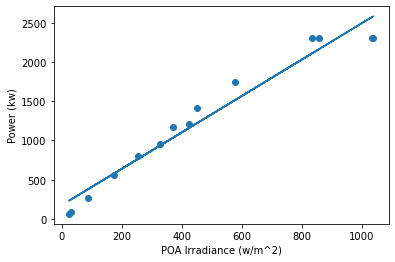

In [50]:
#Looking at the linear relationship of power with Irradiance in high negative power data set
import scipy.stats
%pylab inline
m, b, r_value, p_value, std_err = scipy.stats.linregress(Error_df_P['POA Irradiance (w/m^2)'], Error_df_P['Power (kw)'].abs())

fig, ax = plt.subplots()
ax.scatter(Error_df_P['POA Irradiance (w/m^2)'],Error_df_P['Power (kw)'].abs())
ax.plot(Error_df_P['POA Irradiance (w/m^2)'], m*Error_df_P['POA Irradiance (w/m^2)'] + b2)
#ax.annotate('r^2: ' + str("{:.2f}".format(r_value**2)), xy=(1950,19500))
#ax.annotate('formula: ' + str("{:.2f}".format(m)) + 'x + ' + str("{:.2f}".format(b)), xy=(1950,18500))
ax.set_xlabel("POA Irradiance (w/m^2)")
ax.set_ylabel("Power (kw)")
fig.show()

print(r_value**2)

#### Filter for High Negative Power

In [54]:
df['Power (kw)'] = np.where(df['Power (kw)'] < -1, df['Power (kw)'].abs() ,df['Power (kw)'])
df.loc[(df['Power (kw)'] < -1)]

,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw)
datetime,,,,


### Working with Negative POA Irradiance

In [55]:
Error_df_POA

,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw)
datetime,,,,
2016-06-03 06:11:00-07:00,8.199398,2.506055,-49.335975,151.557568
2016-11-18 08:21:00-07:00,10.102320,0.600181,-785.021595,2307.570838
2017-05-18 07:14:00-07:00,8.400621,0.600228,-200.564238,632.009058
2017-06-24 13:47:00-07:00,32.481559,4.596756,-656.011665,1716.009508
2018-10-17 13:31:00-07:00,14.211698,2.201149,-675.793710,1020.544768
2018-12-31 08:38:00-07:00,-9.295066,2.700326,-645.518657,2118.463986
2019-03-30 09:48:00-07:00,8.985223,3.296598,-280.084352,871.283216
2019-04-04 10:33:00-07:00,1.000629,3.599742,-460.875641,1446.938097
2019-05-10 05:55:00-07:00,9.894949,2.498430,-26.917482,73.165729


Populating the interactive namespace from numpy and matplotlib
0.8503916700756363


<ipython-input-58-8ceb40f64cb9>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


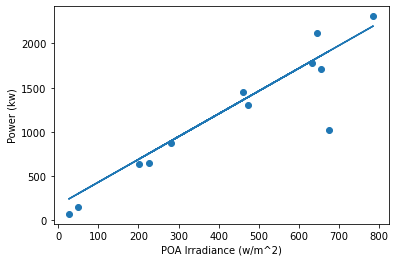

In [58]:
#Looking at the linear relationship of power with Irradiance in high negative power data set
import scipy.stats
%pylab inline
m, b, r_value, p_value, std_err = scipy.stats.linregress(Error_df_POA['POA Irradiance (w/m^2)'].abs(), Error_df_POA['Power (kw)'])

fig, ax = plt.subplots()
ax.scatter(Error_df_POA['POA Irradiance (w/m^2)'].abs(),Error_df_POA['Power (kw)'].abs())
ax.plot(Error_df_POA['POA Irradiance (w/m^2)'].abs(), m*Error_df_POA['POA Irradiance (w/m^2)'].abs() + b2)
#ax.annotate('r^2: ' + str("{:.2f}".format(r_value**2)), xy=(1950,19500))
#ax.annotate('formula: ' + str("{:.2f}".format(m)) + 'x + ' + str("{:.2f}".format(b)), xy=(1950,18500))
ax.set_xlabel("POA Irradiance (w/m^2)")
ax.set_ylabel("Power (kw)")
fig.show()

print(r_value**2)

In [ ]:
Similar to high negative power we can assume the negative irradiance was mistake and its should be positive.

#### Filtering our negative POA irradiance

In [59]:
df['POA Irradiance (w/m^2)'] = np.where(df['POA Irradiance (w/m^2)'] < -1, df['POA Irradiance (w/m^2)'].abs() ,df['POA Irradiance (w/m^2)'])
df.loc[(df['POA Irradiance (w/m^2)'] < 0)]

,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw)
datetime,,,,


High negative power and Irradiance is filter out by making negative to positive as they have linear relationship with each ohher in the error data set and the orginal high power dataset as well. 

#### Filtering out negative wind speed 

In [61]:
df['Wind Speed (m/s)'] = np.where(df['Wind Speed (m/s)'] < 0, NaN,df['Wind Speed (m/s)'])
df['Wind Speed (m/s)'] = df['Wind Speed (m/s)'].ffill()
#counting no of negative wind speed values
(df['Wind Speed (m/s)'] < 0).sum().sum()

0

## Working with Low Negative Power i.e between 0 and -1

Now we just need to filter the low negative power i.e between 0 and -1 form the dataset. As it doesnot have good correlation with any of the features. 
We need to replace those value by average value of that time in previous year. 

Lets group the data with year, months, day, hour and minute

In [128]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['Hour'] = df.index.hour
df['Minute'] = df.index.minute
df

,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw),Year,Month,Day,Hour,Minute
datetime,,,,,,,,,
2016-01-01 07:24:00-07:00,9.807612,1.301536,4.704255,-0.691365,2016,1,1,7,24
2016-01-01 07:25:00-07:00,9.907775,3.096331,4.704255,-0.691365,2016,1,1,7,25
2016-01-01 07:26:00-07:00,9.984213,3.999132,4.704255,-0.691365,2016,1,1,7,26
2016-01-01 07:27:00-07:00,10.004195,4.800663,5.450435,-0.691467,2016,1,1,7,27
2016-01-01 07:28:00-07:00,10.100915,5.901452,6.617401,-0.692205,2016,1,1,7,28
...,...,...,...,...,...,...,...,...,...
2020-12-31 16:41:00-07:00,2.199453,10.602189,6.000877,-0.692031,2020,12,31,16,41
2020-12-31 16:42:00-07:00,2.102146,9.810486,5.509629,-0.691690,2020,12,31,16,42
2020-12-31 16:43:00-07:00,2.094691,9.284071,5.293106,-0.691843,2020,12,31,16,43


In [129]:
#dfG = df.groupby(['Month', 'Day', 'Hour', 'Minute']).agg(['mean', 'count', 'sum'])
dfGb = df[df['Power (kw)'] >= 0]
dfGb

,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw),Year,Month,Day,Hour,Minute
datetime,,,,,,,,,
2016-01-01 07:39:00-07:00,9.002255,2.500149,12.936129,0.861401,2016,1,1,7,39
2016-01-01 07:40:00-07:00,8.996669,2.895838,13.608054,8.272520,2016,1,1,7,40
2016-01-01 07:41:00-07:00,9.106908,2.403802,14.376006,14.983253,2016,1,1,7,41
2016-01-01 07:42:00-07:00,9.203936,3.695459,15.455331,21.708371,2016,1,1,7,42
2016-01-01 07:43:00-07:00,9.197455,2.999468,16.794129,28.011696,2016,1,1,7,43
...,...,...,...,...,...,...,...,...,...
2020-12-31 16:25:00-07:00,2.201156,11.578501,15.107673,22.438004,2020,12,31,16,25
2020-12-31 16:26:00-07:00,2.103948,11.708075,14.459017,18.508213,2020,12,31,16,26
2020-12-31 16:27:00-07:00,2.097064,10.790878,13.788398,14.071687,2020,12,31,16,27


In [130]:
dfGbf = dfGb.groupby(['Month', 'Day', 'Hour', 'Minute']).mean()
dfGbf

Ambient Temperature (C)  Wind Speed (m/s)  \
Month Day Hour Minute                                              
1     1   7    26                    -0.400303          0.499564   
               27                    -0.400134          0.399051   
               28                    -0.399928          0.798447   
               29                    -0.499495          0.700217   
               30                    -0.501237          0.399746   
...                                        ...               ...   
12    31  16   26                    -2.598801          3.161161   
               27                    -2.638332          3.017894   
               28                    -0.748908          3.647341   
               29                    -0.774576          3.996808   
               30                    -1.898434          3.404168   

                       POA Irradiance (w/m^2)  Power (kw)     Year  
Month Day Hour Minute                                               
1     1   7    26                    4.555558    1.000000  2019.00  
               27                    5.276053    1.000000  2019.00  
               28                    5.625602    1.000000  2019.00  
               29                    6.223345    1.000000  2019.00  
               30                    6.736831    1.000000  2019.00  
...                                       ...         ...      ...  
12    31  16   26                   17.403851   26.950529  2018.00  
               27                   16.057269   19.994515  2018.00  
               28                   16.963720   16.567719  2017.75  
               29                   16.038495    8.253726  2017.75  
               30                   24.566258    7.662114  2016.00  

[259555 rows x 5 columns]

In [127]:
dfGbf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ambient Temperature (C),259555.0,14.114423,8.484600,-15.926268,7.755838,14.267062,21.493469,31.558601
Wind Speed (m/s),259555.0,3.575782,1.478024,0.000000,2.500880,3.319422,4.341163,19.235187
POA Irradiance (w/m^2),259555.0,524.155994,249.839651,0.299671,357.809116,544.678158,701.080866,1172.989745
Power (kw),259555.0,1364.478039,593.228454,0.000000,1024.121160,1472.856395,1808.422956,2311.513846
Year,259555.0,2018.007275,0.121400,2016.000000,2018.000000,2018.000000,2018.000000,2020.000000


In [131]:
dfGbN = df[df['Power (kw)'] < 0]
dfGbN

,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw),Year,Month,Day,Hour,Minute
datetime,,,,,,,,,
2016-01-01 07:24:00-07:00,9.807612,1.301536,4.704255,-0.691365,2016,1,1,7,24
2016-01-01 07:25:00-07:00,9.907775,3.096331,4.704255,-0.691365,2016,1,1,7,25
2016-01-01 07:26:00-07:00,9.984213,3.999132,4.704255,-0.691365,2016,1,1,7,26
2016-01-01 07:27:00-07:00,10.004195,4.800663,5.450435,-0.691467,2016,1,1,7,27
2016-01-01 07:28:00-07:00,10.100915,5.901452,6.617401,-0.692205,2016,1,1,7,28
...,...,...,...,...,...,...,...,...,...
2020-12-31 16:41:00-07:00,2.199453,10.602189,6.000877,-0.692031,2020,12,31,16,41
2020-12-31 16:42:00-07:00,2.102146,9.810486,5.509629,-0.691690,2020,12,31,16,42
2020-12-31 16:43:00-07:00,2.094691,9.284071,5.293106,-0.691843,2020,12,31,16,43


In [132]:
dfGbN = dfGbN.groupby(['Month', 'Day', 'Hour', 'Minute']).mean()
dfGbN

Ambient Temperature (C)  Wind Speed (m/s)  \
Month Day Hour Minute                                              
1     1   7    24                    -1.243130          3.438037   
               25                    -1.256793          3.699743   
               26                    -1.431716          4.972339   
               27                    -1.373289          4.474291   
               28                    -1.372959          4.425040   
...                                        ...               ...   
12    31  16   41                    -2.759600          3.059906   
               42                    -2.738155          2.822261   
               43                    -2.700275          2.817048   
               44                    -2.740697          2.860980   
               45                    -0.898491          2.951089   

                       POA Irradiance (w/m^2)  Power (kw)     Year  
Month Day Hour Minute                                               
1     1   7    24                    7.582809   -0.691872  2018.00  
               25                    7.444161   -0.691874  2018.00  
               26                    6.950071   -0.691789  2017.75  
               27                    8.749971   -0.692171  2017.75  
               28                   11.317257   -0.691465  2017.75  
...                                       ...         ...      ...  
12    31  16   41                    6.827521   -0.691763  2018.00  
               42                    6.347871   -0.692134  2018.00  
               43                    6.965365   -0.691884  2018.00  
               44                    8.700344   -0.691980  2018.00  
               45                    9.197619   -0.691945  2017.75  

[15019 rows x 5 columns]

In [ ]:
We cannot replace 15019 rows values as the power is negative for all five years. Its a better idea to insert average of power of that hour where there is negative. 

In [133]:
dfH = df[df['Power (kw)'] >= 0]
dfH = dfGb.groupby(['Month', 'Day', 'Hour']).mean()
dfH

Ambient Temperature (C)  Wind Speed (m/s)  \
Month Day Hour                                              
1     1   7                   -1.546617          3.202579   
          8                   -1.760424          2.602610   
          9                   -0.555874          2.689589   
          10                   0.024568          2.234350   
          11                   1.503511          2.516267   
...                                 ...               ...   
12    31  12                  -2.644095          5.684439   
          13                  -2.469161          4.990055   
          14                  -2.005443          3.807111   
          15                  -2.153547          3.217675   
          16                  -2.194527          3.070844   

                POA Irradiance (w/m^2)   Power (kw)         Year     Minute  
Month Day Hour                                                               
1     1   7                  73.575238   168.259720  2018.112069  47.258621  
          8                 234.505163   745.235511  2018.000000  29.500000  
          9                 336.103116  1049.017676  2018.000000  29.500000  
          10                369.127520  1176.301082  2018.000000  29.500000  
          11                378.332587  1183.573627  2018.000000  29.500000  
...                                ...          ...          ...        ...  
12    31  12                460.070880  1388.065495  2018.000000  29.500000  
          13                505.886770  1558.373881  2018.000000  29.500000  
          14                559.827455  1748.029659  2018.000000  29.500000  
          15                451.417534  1431.130420  2018.000000  29.500000  
          16                134.776854   367.001414  2017.973154  14.416107  

[4696 rows x 6 columns]

In [67]:
type(dfNG)

#dfNG.loc[(dfNG['Power (kw)'] < 0)]


pandas.core.frame.DataFrame

In [68]:
df

,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw)
datetime,,,,
2016-01-01 07:24:00-07:00,9.807612,1.301536,4.704255,-0.691365
2016-01-01 07:25:00-07:00,9.907775,3.096331,4.704255,-0.691365
2016-01-01 07:26:00-07:00,9.984213,3.999132,4.704255,-0.691365
2016-01-01 07:27:00-07:00,10.004195,4.800663,5.450435,-0.691467
2016-01-01 07:28:00-07:00,10.100915,5.901452,6.617401,-0.692205
...,...,...,...,...
2020-12-31 16:41:00-07:00,2.199453,10.602189,6.000877,-0.692031
2020-12-31 16:42:00-07:00,2.102146,9.810486,5.509629,-0.691690
2020-12-31 16:43:00-07:00,2.094691,9.284071,5.293106,-0.691843


In [71]:
P01= df[df['Power (kw)'].between(-1,0, inclusive = False)]
P01.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ambient Temperature (C),55621.0,11.310187,9.749734,-24.601958,4.595526,12.114133,19.041440,32.561346
Wind Speed (m/s),55621.0,3.333640,2.574177,0.000000,1.695945,2.701405,4.200461,28.875421
POA Irradiance (w/m^2),55621.0,11.869436,33.370541,0.000000,4.517878,7.525500,11.637822,527.000000
Power (kw),55621.0,-0.689329,0.029848,-0.695012,-0.692317,-0.691917,-0.691515,-0.344931


<AxesSubplot:xlabel='POA Irradiance (w/m^2)', ylabel='Count'>

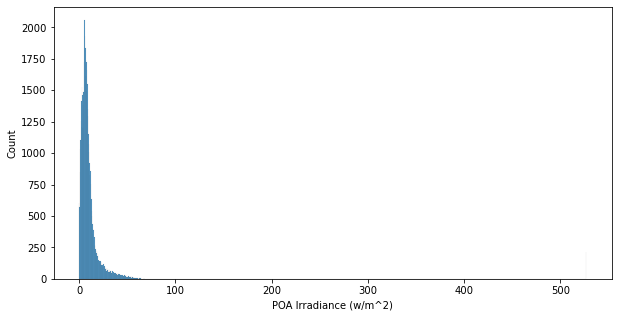

In [72]:
plt.figure(figsize=(10,5))
sns.histplot(P01['POA Irradiance (w/m^2)'])

In [146]:
Low_I= df[df['POA Irradiance (w/m^2)'].between(0,50, inclusive = True)]
Low_I.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ambient Temperature (C),176985.0,11.028896,9.896565,-24.601958,3.908193,11.387633,18.995911,32.672008
Wind Speed (m/s),176985.0,3.498195,2.607066,0.000000,1.702089,2.897750,4.405963,29.676466
POA Irradiance (w/m^2),176985.0,21.395288,13.977472,0.000000,9.025871,18.741794,32.804928,49.999871
Power (kw),176985.0,45.015461,46.969344,-0.695012,-0.691384,32.590576,82.025183,350.602313
Year,176985.0,2017.991366,1.402392,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000
Month,176985.0,6.488798,3.225037,1.000000,4.000000,6.000000,9.000000,12.000000
Day,176985.0,15.754855,8.845963,1.000000,8.000000,16.000000,23.000000,31.000000
Hour,176985.0,12.422895,5.502414,4.000000,6.000000,16.000000,17.000000,19.000000
Minute,176985.0,29.443586,17.226963,0.000000,15.000000,29.000000,44.000000,59.000000


In [147]:
Low_Ip = Low_I[Low_I['Power (kw)'] >= 0]
Low_Ip.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ambient Temperature (C),122031.0,10.877111,9.956426,-23.921449,3.701941,10.901007,18.914528,32.672008
Wind Speed (m/s),122031.0,3.575126,2.621732,0.000000,1.799073,2.904511,4.594293,29.676466
POA Irradiance (w/m^2),122031.0,26.762527,12.695211,0.299671,16.145131,26.124010,37.503069,49.999871
Power (kw),122031.0,65.597617,42.839996,0.000000,29.430209,62.270712,99.354665,350.602313
Year,122031.0,2017.996902,1.396102,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000
Month,122031.0,6.351353,3.184132,1.000000,4.000000,6.000000,9.000000,12.000000
Day,122031.0,15.743254,8.850017,1.000000,8.000000,16.000000,23.000000,31.000000
Hour,122031.0,12.698511,5.167385,4.000000,7.000000,16.000000,17.000000,19.000000
Minute,122031.0,29.355762,17.556874,0.000000,14.000000,29.000000,45.000000,59.000000


<AxesSubplot:xlabel='Power (kw)', ylabel='Count'>

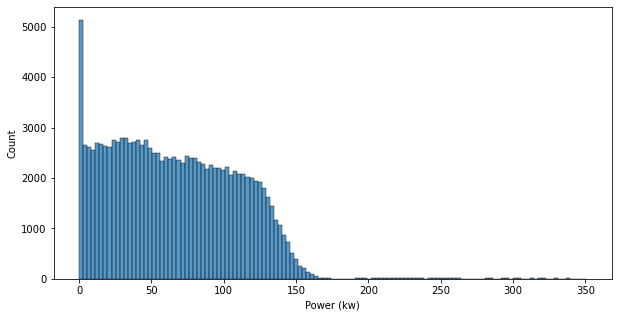

In [148]:
plt.figure(figsize=(10,5))
sns.histplot(Low_Ip['Power (kw)'])

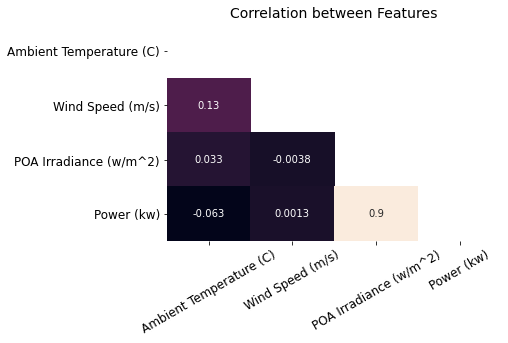

In [149]:
#Lokking at the correlation of different features of dataset. 
#developing function to get customized heatmap
def correlation_heat_map(df, title, size):
    """DOCSTRING
    This function plots a correlation heatmap for a dataframe, masking duplicate values.
    """
    corrs = df.corr()
    
    # set figure size
    fig, ax = plt.subplots(figsize = size)
    
    # generate a mask for the upper triagle 
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    #plot heatmap
    ax = sns.heatmap(corrs, mask=mask, annot = True, cbar=False)
    
    #resize labels
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12, rotation=0)
    ax.set_title(title, fontsize=14)
    
    plt.show()
correlation_heat_map(Low_Ip[['Ambient Temperature (C)', 'Wind Speed (m/s)', 'POA Irradiance (w/m^2)','Power (kw)']], 'Correlation between Features', (6,4))

Populating the interactive namespace from numpy and matplotlib
0.8147798630615994


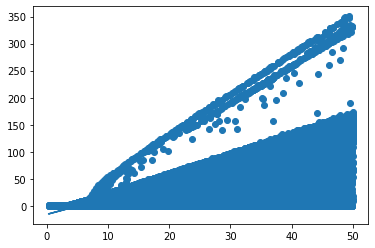

In [150]:
#Looking at the linear relationship of power with Irradiance in high negative power data set
import scipy.stats
%pylab inline
m, b, r_value, p_value, std_err = scipy.stats.linregress(Low_Ip['POA Irradiance (w/m^2)'], Low_Ip['Power (kw)'])

fig, ax = plt.subplots()
ax.scatter(Low_Ip['POA Irradiance (w/m^2)'].abs(),Low_Ip['Power (kw)'])
ax.plot(Low_Ip['POA Irradiance (w/m^2)'].abs(), m*Low_Ip['POA Irradiance (w/m^2)'] + b)
print(r_value**2)
#ax.ann

In [102]:
Med_I= df[df['POA Irradiance (w/m^2)'].between(40,500, inclusive = True)]
Med_I.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ambient Temperature (C),512900.0,12.156041,10.407709,-26.896399,4.798964,12.804992,20.318688,37.396496
Wind Speed (m/s),512900.0,3.493324,2.801480,0.000000,1.698741,2.700390,4.395142,30.055129
POA Irradiance (w/m^2),512900.0,215.103612,130.950209,40.000294,98.426025,189.873695,315.500120,499.995780
Power (kw),512900.0,639.016581,413.284348,-0.693931,280.372253,556.759353,945.655706,2312.937495


Populating the interactive namespace from numpy and matplotlib
0.9275098072658028
3.0394990983216266
-14.790653245992871


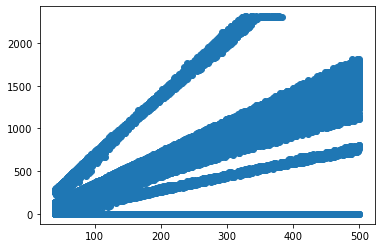

In [103]:
#Looking at the linear relationship of power with Irradiance in high negative power data set
import scipy.stats
%pylab inline
m, b, r_value, p_value, std_err = scipy.stats.linregress(Med_I['POA Irradiance (w/m^2)'], Med_I['Power (kw)'])

fig, ax = plt.subplots()
ax.scatter(Med_I['POA Irradiance (w/m^2)'],Med_I['Power (kw)'])
ax.plot(Med_I['POA Irradiance (w/m^2)'].abs(), m*Med_I['POA Irradiance (w/m^2)'] + b)
print(r_value**2)
print(m)
print(b)
#ax.ann

# Design of Filter 
Based on our observation so far

In [ ]:
df

In [ ]:
df.info()

In [ ]:
# Filtering negative value of wind speed
df['Wind Speed (m/s)'] = np.where(df['Wind Speed (m/s)'] < 0, NaN,df['Wind Speed (m/s)'])
df['Wind Speed (m/s)'] = df['Wind Speed (m/s)'].ffill()
#counting no of negative wind speed values
(df['Wind Speed (m/s)'] < 0).sum().sum()

Negative wind speed data is filter out and replaced with the value of wind speed according to ***persistence forecasting model***. 

In [ ]:
#m1*df2['Power (kw)'] + b1
df['POA Irradiance (w/m^2)'] = np.where(df['POA Irradiance (w/m^2)'] < 0, m1*df['Power (kw)'] + b1 ,df['POA Irradiance (w/m^2)'])
df['POA Irradiance (w/m^2)'] = np.where(df['POA Irradiance (w/m^2)'].isna(), m1*df['Power (kw)'] + b1 ,df['POA Irradiance (w/m^2)'])
df['POA Irradiance (w/m^2)'] = np.where(df['POA Irradiance (w/m^2)'].isna(), df['POA Irradiance (w/m^2)'].ffill() ,df['POA Irradiance (w/m^2)'])
df['POA Irradiance (w/m^2)'] = np.where(df['POA Irradiance (w/m^2)'].isna(), df['POA Irradiance (w/m^2)'].bfill() ,df['POA Irradiance (w/m^2)'])
df.info()

In [ ]:
#Checking if there are still negative value or not
(df['POA Irradiance (w/m^2)'] < 0).sum().sum()

In [ ]:
#We need to filter out these values. But lets see what is the value of Power at this place. 
df.loc[(df['POA Irradiance (w/m^2)'] < 0)]

In [ ]:
It is clear that the value of power at these points are 0. So, we can make the value of Irradiance zero as well. 

In [ ]:
df['POA Irradiance (w/m^2)'] = np.where(df['POA Irradiance (w/m^2)'] < 0, 0 ,df['POA Irradiance (w/m^2)'])

In [ ]:
#m1*df2['Power (kw)'] + b1
df['Power (kw)'] = np.where(df['Power (kw)'] < 0, m*df['POA Irradiance (w/m^2)'] + b ,df['Power (kw)'])
df['Power (kw)'] = np.where(df['Power (kw)'].isna(), m*df['POA Irradiance (w/m^2)'] + b ,df['Power (kw)'])
#df['Power (kw)'] = np.where(df['Power (kw)'].isna(), df['Power (kw)'].ffill(), df['Power (kw)'])
#df['Power (kw)'] = np.where(df['Power (kw)'].isna(), df['Power (kw)'].bfill(), df['Power (kw)'])
df.info()

In [ ]:
#We should again check if there are any position where there is power value where there POA irradiance is zero as this is physically impossible
df.loc[(df['POA Irradiance (w/m^2)'] == 0)]

In these loation we need to make power zero as well.

In [ ]:
df['Power (kw)'] = np.where(df['Power (kw)'] == m, 0 ,df['Power (kw)'])

In [ ]:
#Lets check the overall dataset after Filtering
plot_cols = ['Ambient Temperature (C)', 'Wind Speed (m/s)', 'POA Irradiance (w/m^2)', 'Power (kw)']
plot_features = df[plot_cols]
_ = plot_features.plot(subplots=True, figsize = (20,20))

In [ ]:
df.describe().transpose()

In [ ]:
#Checking our filtering produced some outliers. Assuming we would not expect more power than our dataset with given irradiance.
x = np.array(df['Power (kw)'].values.tolist())
df['Power (kw)'] = np.where(x > 2317.143741, 2317.143741, x)   #2317.143741 it is maximum value of power form orginal dataframe
df.describe().transpose()

Now we have a complete dataset by filling and filtering unrealistic data. 

Lets check other information from the data

# Visualization of daily and monthly data 

In [ ]:
# I am going to create a new data frame so I can make the appropriate boxplots. 
df3= df.reset_index()
import datetime as dt

# create timestamp as a column and another hour column
df3['datetime'] = pd.to_datetime(df3['datetime']).apply(lambda x: dt.datetime.strftime(x,'%Y-%m-%d %H:%M:%S'))
df3['datetime']=pd.to_datetime(df3['datetime'])
df3['hour'] = df3['datetime'].dt.hour

# Create a boxplot of the average solar generation production

plt.figure(figsize=(10,5))
sns.boxplot(df3['hour'], df3['Power (kw)'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_axisbelow(True)
plt.gca().grid(axis='y',alpha=.7)

plt.title('Average Hourly Solar Power',fontsize=20)

plt.xlabel('Time (4 am to 7 pm )', fontsize=20)

plt.ylabel("Power (kW) ",rotation='0',ha='right', fontsize=20)
plt.show()

We see that the data has a large interquartile range. It follows the pattern we would expect with the the average solar production being highest around midday

In [ ]:
# I am going to create a new data frame so I can make the appropriate boxplots. 
df4= df.reset_index()
import datetime as dt
# create timestamp as a column and another months column
df4['datetime'] = pd.to_datetime(df4['datetime']).apply(lambda x: dt.datetime.strftime(x,'%Y-%m-%d %H:%M:%S'))
df4['datetime']=pd.to_datetime(df4['datetime'])
df4['month'] = df4['datetime'].dt.month

# Create a boxplot of the average solar generation production of every months

plt.figure(figsize=(10,5))
sns.boxplot(df4['month'], df4['Power (kw)'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_axisbelow(True)
plt.gca().grid(axis='y',alpha=.7)

plt.title('Average Monthly Solar Power',fontsize=20)

plt.xlabel('Months', fontsize=20)

plt.ylabel("Power (kW) ",rotation='0',ha='right', fontsize=20)
plt.show()

Dec and Jan are two months where there is less amount of power production. Obviously it should be winter

In [ ]:
#Lets check the overall dataset after filtering and filling NaNs
plot_cols = ['Ambient Temperature (C)', 'Wind Speed (m/s)', 'POA Irradiance (w/m^2)', 'Power (kw)']
plot_features = df[plot_cols]
_ = plot_features.plot(subplots=True, figsize = (20,20))

In [ ]:
#Looking at the statistics of dataset after filtering 
df.describe().transpose()

Some data are missing in the some months of 2022. We need to figure it out which data are missing. Lets check the data of the year 2019 and 2020 as we can see different plot as we not expect. 

In [ ]:
df_2018 = df['2018']
df_2018

In [ ]:
df_2018['Power (kw)'].plot()

We found out that it is in the months of 10 i.e October. Lets check that. 

In [ ]:
df_2018_Oct = df_2018['2018-10']
ax = df_2018_Oct['Power (kw)'].plot()
ax.set_ylabel("Power (kw)")

In [ ]:
#df_2018_Oct.describe()
df_2018_Oct.loc['2018-10-16':'2018-10-29'].describe()

It is seen that the power produced for 15 days form 16th Oct to 29th Oct of the year 2018 is lower than other days. 

In [ ]:
df_2020 = df['2020']
df_2020['Power (kw)'].plot()
ax.set_ylabel("Power (kw)")

In [ ]:
df_2020_Apr = df['2020-4']
ax = df_2020_Apr['Power (kw)'].plot()
ax.set_ylabel("Power (kw)")

In [ ]:
#df_Power_April = df_2020_Apr['Power (kw)']
df_2020_Apr.loc['2020-04-20':'2020-04-28'].describe()

In [ ]:
df_2020_Apr.loc['2020-04-20':'2020-04-28'].describe()

It is clearly seen that the PV power plant is not producing any energy for 9 days from April 20th to April 28 of 2020. This missing information will be problem if we want to make prediction model to estimate power. So, we can replace it by average power at the same time from previous year. 

# Meteorological Normalization of PV Plant Performance

We have seen from the scatter plot and corresponding R2 value. Only POA Irradiance and Power have liner fitting. However, other have not any linear correlation with Power. So, linear model doesnot fit to evaluate PV performance. 

In [ ]:
#Importing library for normalie performance using regression trees
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [ ]:
#Classify the data set into predictors and targe and also normalize the predictor to have value between 0 and 1 so that it would be easier for model to predict. 
target_column = ['Power (kw)'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

In [ ]:
#train test split
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

In [ ]:
dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

dtree.fit(X_train, y_train)

In [ ]:
DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
               max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=0.13,
               min_samples_split=2, min_weight_fraction_leaf=0.0,
             random_state=3, splitter='best')

In [ ]:
pred_train_tree= dtree.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_tree)))
print(r2_score(y_train, pred_train_tree))

pred_test_tree= dtree.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_tree))) 
print(r2_score(y_test, pred_test_tree))

In [ ]:
#Hyperparameter tuning to get optimized output. 
# Code Lines 1 to 4: Fit the regression tree 'dtree1' and 'dtree2' 
dtree1 = DecisionTreeRegressor(max_depth=2)
dtree2 = DecisionTreeRegressor(max_depth=5)
dtree3 = DecisionTreeRegressor(max_depth=7)

dtree1.fit(X_train, y_train)
dtree2.fit(X_train, y_train)
dtree3.fit(X_train, y_train)

# Code Lines 5 to 6: Predict on training data
tr1 = dtree1.predict(X_train)
tr2 = dtree2.predict(X_train)
tr3 = dtree3.predict(X_train)

#Code Lines 7 to 8: Predict on testing data
y1 = dtree1.predict(X_test)
y2 = dtree2.predict(X_test) 
y3 = dtree3.predict(X_test)

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print(np.sqrt(mean_squared_error(y_train,tr1))) 
print(r2_score(y_train, tr1))

# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print(np.sqrt(mean_squared_error(y_test,y1))) 
print(r2_score(y_test, y1)) 

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree2' on training data
print(np.sqrt(mean_squared_error(y_train,tr3))) 
print(r2_score(y_train, tr3))

# Print RMSE and R-squared value for regression tree 'dtree2' on testing data
print(np.sqrt(mean_squared_error(y_test,y3))) 
print(r2_score(y_test, y3))